# Load the Datasets

In [ ]:
'''
@Time    :   2025/02/19 13:10:50
@Author  :   Peng Zhao
'''

In [ ]:
! pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("heegyu/chart2text_pew")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['id', 'old_id', 'title', 'imgPath', 'caption', 'URL', 'dataPath', 'chartType', 'complexity', 'topic', 'bboxesPath', 'image', 'data'],
        num_rows: 6500
    })
    test: Dataset({
        features: ['id', 'old_id', 'title', 'imgPath', 'caption', 'URL', 'dataPath', 'chartType', 'complexity', 'topic', 'bboxesPath', 'image', 'data'],
        num_rows: 1393
    })
    val: Dataset({
        features: ['id', 'old_id', 'title', 'imgPath', 'caption', 'URL', 'dataPath', 'chartType', 'complexity', 'topic', 'bboxesPath', 'image', 'data'],
        num_rows: 1392
    })
})


In [ ]:
train = ds["train"]
test = ds["test"]
val = ds["val"]

In [ ]:
import pandas as pd
df = train.to_pandas()
df.head()

,id,old_id,title,imgPath,caption,URL,dataPath,chartType,complexity,topic,bboxesPath,image,data
0,6678,no_data-17463,"Fewer Hearing Mostly Bad"" Economic News Mix of...",multiColumn/imgs/6678.png,Public perceptions of the tone of economic new...,https://www.pewresearch.org/politics/2011/01/1...,multiColumn/data/6678.txt,line,complex,U.S. Politics & Policy,multiColumn/bboxes/6678.json,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"Fewer Hearing Mostly Bad"" Economic News | 80 ..."
1,3732,no_data-8555,Most talk about election with like-minded vote...,multiColumn/imgs/3732.png,About three-quarters of Trump supporters (76%)...,https://www.pewresearch.org/politics/2016/08/0...,multiColumn/data/3732.txt,bar,complex,U.S. Politics & Policy,multiColumn/bboxes/3732.json,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,Most talk about election | with like-minded v...
2,2125,no_data-4817,Hispanics are likely to cite family-related li...,multiColumn/imgs/2125.png,The life goals of Latinos overlap with some of...,https://www.pewresearch.org/fact-tank/2018/09/...,multiColumn/data/2125.txt,bar,complex,Social & Demographic Trends,multiColumn/bboxes/2125.json,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,Hispanics are likely to cite family-related li...
3,3633,no_data-8358,People sharing had different feelings companie...,multiColumn/imgs/3633.png,Many Americans struggle to understand the natu...,https://www.pewresearch.org/fact-tank/2016/09/...,multiColumn/data/3633.txt,bar,complex,U.S. Politics & Policy,multiColumn/bboxes/3633.json,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,People sharing had different feelings companie...
4,5039,no_data-11632,Asia Sees Most Progress Personal progress: Rat...,multiColumn/imgs/5039.png,Many people in emerging and developing nations...,https://www.pewresearch.org/global/2014/10/30/...,multiColumn/data/5039.txt,bar,complex,Global Attributes & Trends,multiColumn/bboxes/5039.json,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,Asia Sees Most Progress | Personal progress: ...


In [ ]:
df.describe()

,id
count,6500.000000
mean,3389.435538
std,2377.793702
min,1.000000
25%,1150.750000
50%,3153.000000
75%,5463.500000
max,7799.000000


# EDA

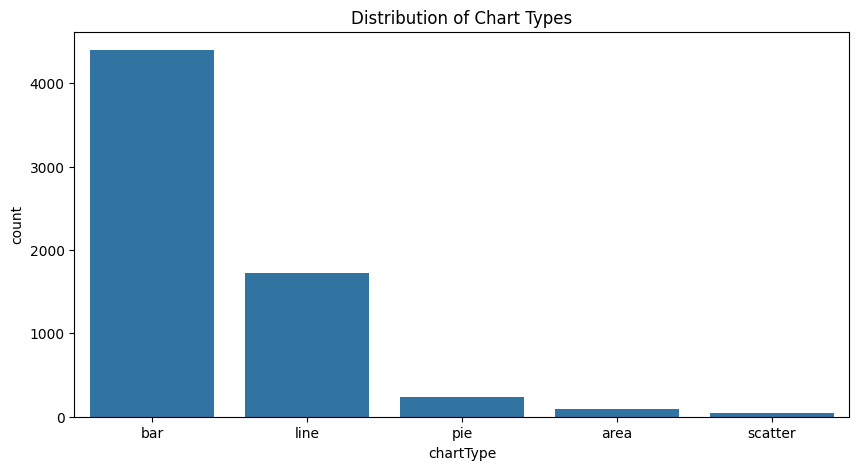

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="chartType", order=df["chartType"].value_counts().index)
plt.title("Distribution of Chart Types")
plt.show()

We can see that bar and line charts are the most frequent, making them the simplest visualizations to observe.

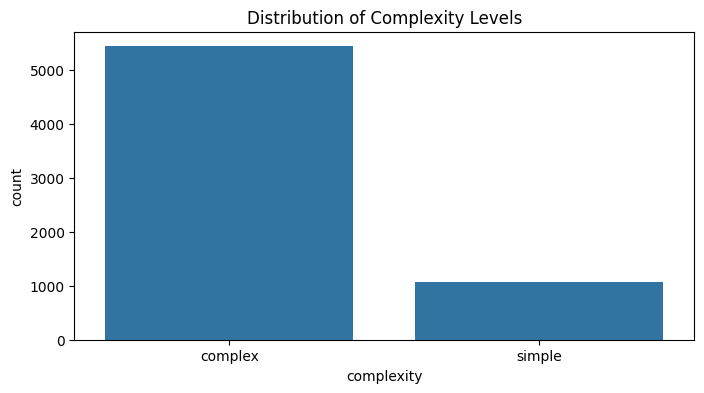

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="complexity", order=df["complexity"].value_counts().index)
plt.title("Distribution of Complexity Levels")
plt.show()

Our dataset contains more complex charts than simple ones, but we will evaluate how well the model analyzes these complex charts to guide our next steps.

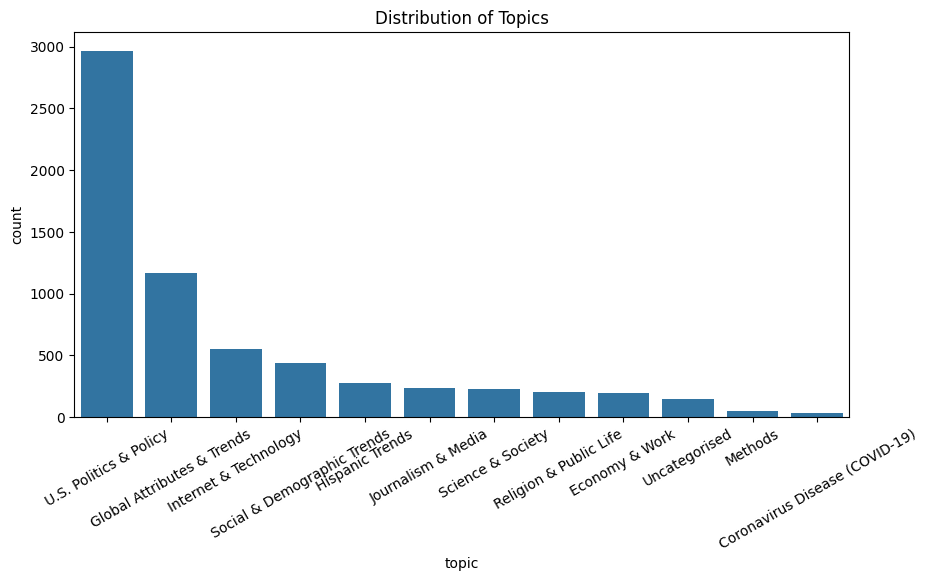

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="topic", order=df["topic"].value_counts().index)
plt.title("Distribution of Topics")
plt.xticks(rotation=30)
plt.show()
## internet technology
## Science and society
## Economy & work
## Methods

Most topics in our dataset focus on U.S. politics and policies, followed by global attributes. This likely reflects the fact that such information is public and easily accessible. However, since our target audience is small businesses, we don't need to use all the available topics.

Error processing image at index 812: not a TIFF file (header b'\x00\x08\x00\x04\x01\x1a\x00\x05' not valid)


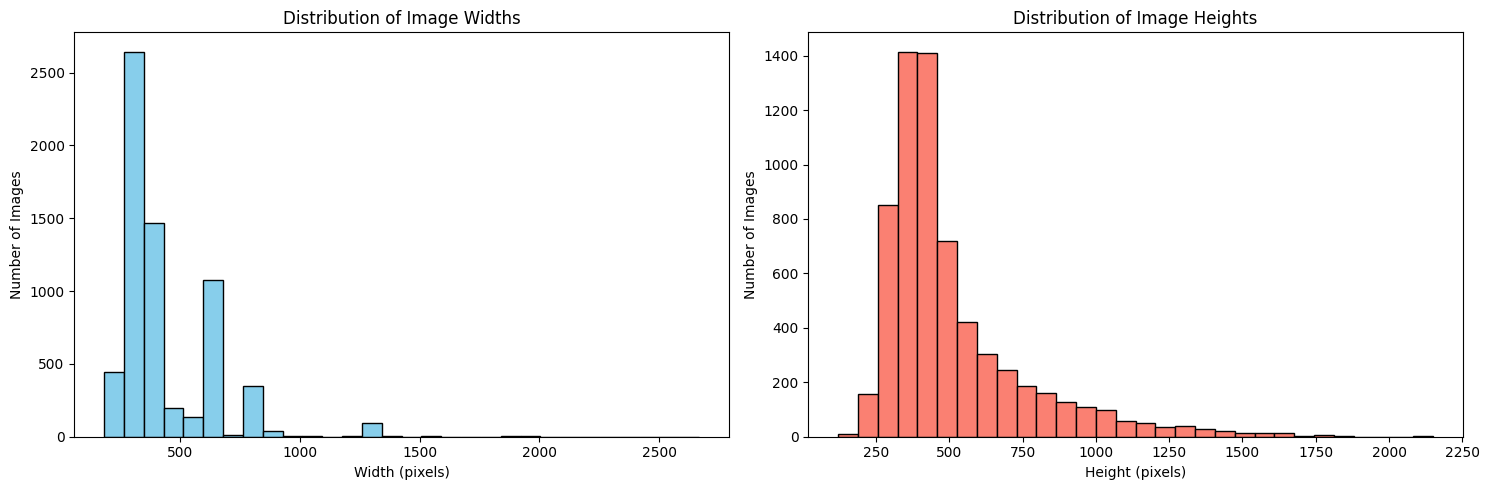

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

widths = []
heights = []

for i in range(len(train)):
    try:
        image = train[i]["image"]
        w, h = image.size
        widths.append(w)
        heights.append(h)
    except Exception as e:
        print(f"Error processing image at index {i}: {e}")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Image Widths')
ax[0].set_xlabel('Width (pixels)')
ax[0].set_ylabel('Number of Images')

ax[1].hist(heights, bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Image Heights')
ax[1].set_xlabel('Height (pixels)')
ax[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

we are noting going to change the image size since it might influence the performnance of the analyst model. We keep all the images within orginial sizes

# Data Preprocessing

In [ ]:
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt

def safe_process_image(image):
    try:
        return image.convert("RGB")
    except Exception as e:
        print("Error processing image:", e)
        return None

In this step, we're creating a function that safely converts an image to the standard RGB format. This helps make sure all images have the same color settings for analysis. If an image can't be converted ，the function catches the error and returns nothing instead of stopping the whole process.

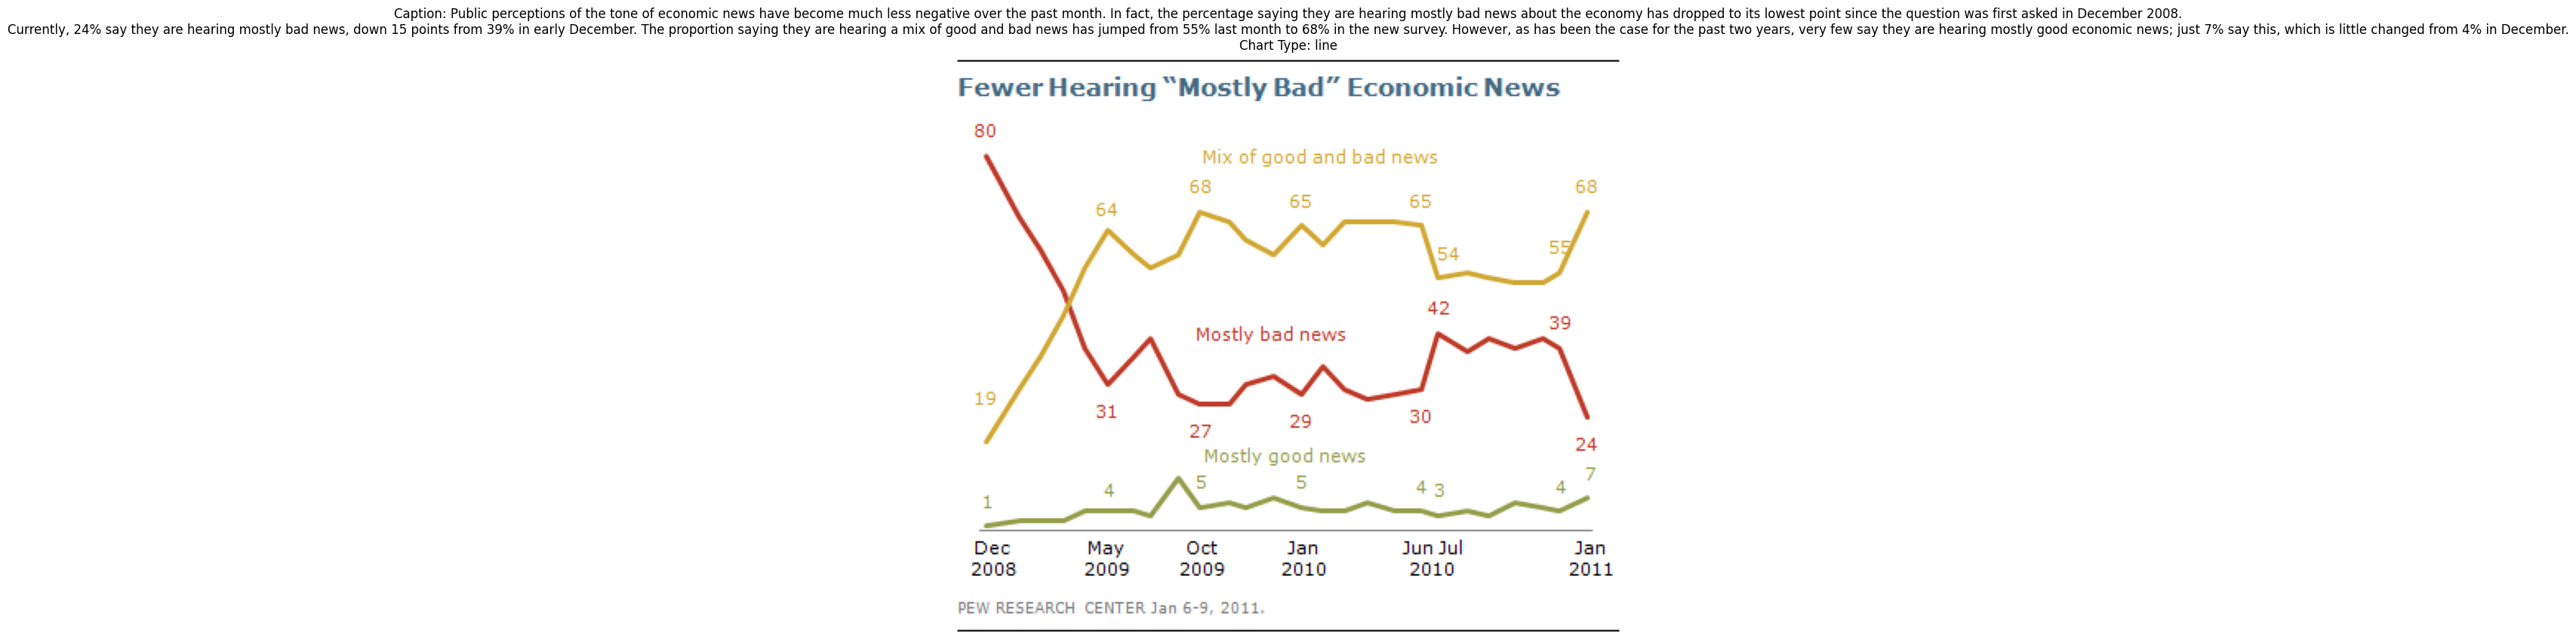

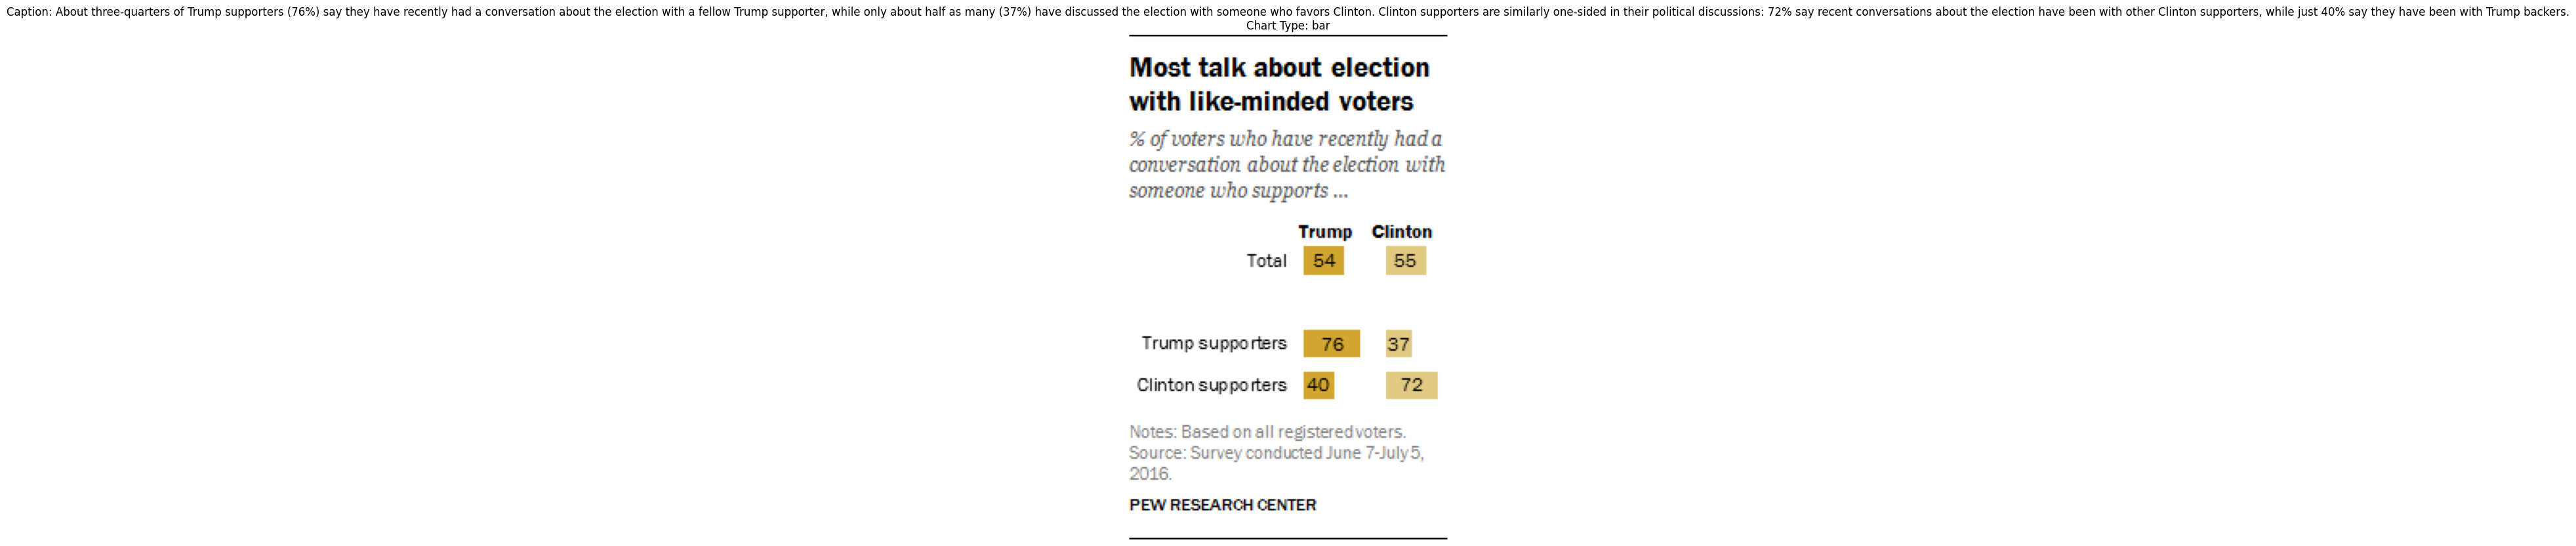

In [ ]:
num_samples = 2
for i in range(num_samples):
    example = train[i]
    processed_image = safe_process_image(example["image"])
    if processed_image:
        plt.figure(figsize=(20, 10))
        plt.imshow(processed_image)
        plt.title(f"Caption: {example['caption']}\nChart Type: {example['chartType']}")
        plt.axis("off")
        plt.show()

Here are few examples we have for the images

In [ ]:
df.isnull().sum()

,0
id,0
old_id,0
title,0
imgPath,0
caption,0
URL,0
dataPath,0
chartType,0
complexity,0
topic,0


no missing values find

In [ ]:
df.dtypes

,0
id,int64
old_id,object
title,object
imgPath,object
caption,object
URL,object
dataPath,object
chartType,object
complexity,object
topic,object


In [ ]:
df.data

,data
0,"Fewer Hearing Mostly Bad"" Economic News | 80 ..."
1,Most talk about election | with like-minded v...
2,Hispanics are likely to cite family-related li...
3,People sharing had different feelings companie...
4,Asia Sees Most Progress | Personal progress: ...
...,...
6495,Suspected bots equally | likely to link to le...
6496,"Among officers, men, whites and | military ve..."
6497,Highly religious Americans are more likely to ...
6498,The Least Financially Secure Preferred Democra...


In [ ]:
def create_prompt(example, image_features=None):
    prompt = (
        f"Analyze the following chart information and summarize the key trends and business implications.\n"
        f"Chart Type: {example['chartType']}\n"
        f"Topic: {example['topic']}\n"
        f"Complexity: {example['complexity']}\n"
        f"Caption: {example['caption']}\n"
    )
    if image_features:
        prompt += f"Image Features: {image_features}\n"
    prompt += "Provide a concise summary highlighting trends and potential business implications."
    return prompt

example = train[0]
processed_image = safe_process_image(example["image"])
image_features = None
prompt = create_prompt(example, image_features)
print(prompt)


Analyze the following chart information and summarize the key trends and business implications.
Chart Type: line
Topic: U.S. Politics & Policy
Complexity: complex
Caption: Public perceptions of the tone of economic news have become much less negative over the past month. In fact, the percentage saying they are hearing mostly bad news about the economy has dropped to its lowest point since the question was first asked in December 2008.
Currently, 24% say they are hearing mostly bad news, down 15 points from 39% in early December. The proportion saying they are hearing a mix of good and bad news has jumped from 55% last month to 68% in the new survey. However, as has been the case for the past two years, very few say they are hearing mostly good economic news; just 7% say this, which is little changed from 4% in December.
Provide a concise summary highlighting trends and potential business implications.


This is a example of prompt we might use for API

In [ ]:
ds.shape

{'train': (6500, 13), 'test': (1393, 13), 'val': (1392, 13)}

In [ ]:
df.columns

Index(['id', 'old_id', 'title', 'imgPath', 'caption', 'URL', 'dataPath',
       'chartType', 'complexity', 'topic', 'bboxesPath', 'image', 'data'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,int64
old_id,object
title,object
imgPath,object
caption,object
URL,object
dataPath,object
chartType,object
complexity,object
topic,object


In [ ]:
df.drop(['old_id', 'imgPath', 'URL', 'dataPath', 'bboxesPath', 'data'], axis=1, inplace=True)

Those are the variables that will not contribute to our analysis, therefore, we decide to drop them

In [ ]:
df.head()

,id,title,caption,chartType,complexity,topic,image
0,6678,"Fewer Hearing Mostly Bad"" Economic News Mix of...",Public perceptions of the tone of economic new...,line,complex,U.S. Politics & Policy,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
1,3732,Most talk about election with like-minded vote...,About three-quarters of Trump supporters (76%)...,bar,complex,U.S. Politics & Policy,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
2,2125,Hispanics are likely to cite family-related li...,The life goals of Latinos overlap with some of...,bar,complex,Social & Demographic Trends,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
3,3633,People sharing had different feelings companie...,Many Americans struggle to understand the natu...,bar,complex,U.S. Politics & Policy,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
4,5039,Asia Sees Most Progress Personal progress: Rat...,Many people in emerging and developing nations...,bar,complex,Global Attributes & Trends,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...


In [ ]:
df['topic'].unique()

array(['U.S. Politics & Policy', 'Social & Demographic Trends',
       'Global Attributes & Trends', 'Economy & Work', 'Hispanic Trends',
       'Internet & Technology', 'Journalism & Media', 'Uncategorised',
       'Religion & Public Life', 'Science & Society',
       'Coronavirus Disease (COVID-19)', 'Methods'], dtype=object)

In [ ]:
topics_to_keep = ["Internet & Technology", "Science & Society", "Economy & Work", "Methods","Uncategorised"]
df2 = df[df["topic"].isin(topics_to_keep)].copy()

Keep all the topics that might relevant to the small business and after this we are creating the subeset

In [ ]:
print(df2.shape)
print(df.shape)

(1178, 7)
(6500, 7)


In [ ]:
df2.head()

,id,title,caption,chartType,complexity,topic,image
5,1440,What Influences National,Why then are Democrats and Republicans now rea...,bar,simple,Economy & Work,{'bytes': b'GIF89a\xd4\x00\xba\x00\xc4\x00\x00...
6,6069,"But fover a longer time frame, housing remains...","As the accompanying charts show, since the for...",line,complex,Economy & Work,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
14,429,14% of Americans have experienced online haras...,"Political views, physical appearance, gender a...",bar,simple,Internet & Technology,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
17,7167,Twitter users more mobile in news consumption,Twitter users are also more likely to use thei...,bar,complex,Internet & Technology,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
23,6169,% of ethnicity marriages involving spouses ofa...,Marriage across racial and ethnic lines contin...,line,complex,Uncategorised,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
